# Time Series Analysis of Air Quality in Bishkek using AR model

# Prepare Data

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.tsa.ar_model import AutoReg
import time
from statsmodels.tsa.arima.model import ARIMA

In [2]:
file_path = r"Bishkek_PM2.5_2019_YTD.csv"

# Load the CSV file into a DataFrame
df19 = pd.read_csv(file_path)

In [3]:
df19

Site          Parameter            Date (LT)  Year  Month  Day  Hour  \
0     Bishkek  PM2.5 - Principal  2019-02-06 06:00 AM  2019      2    6     6   
1     Bishkek  PM2.5 - Principal  2019-02-06 07:00 AM  2019      2    6     7   
2     Bishkek  PM2.5 - Principal  2019-02-06 08:00 AM  2019      2    6     8   
3     Bishkek  PM2.5 - Principal  2019-02-06 09:00 AM  2019      2    6     9   
4     Bishkek  PM2.5 - Principal  2019-02-06 10:00 AM  2019      2    6    10   
...       ...                ...                  ...   ...    ...  ...   ...   
7746  Bishkek  PM2.5 - Principal  2019-12-31 08:00 PM  2019     12   31    20   
7747  Bishkek  PM2.5 - Principal  2019-12-31 09:00 PM  2019     12   31    21   
7748  Bishkek  PM2.5 - Principal  2019-12-31 10:00 PM  2019     12   31    22   
7749  Bishkek  PM2.5 - Principal  2019-12-31 11:00 PM  2019     12   31    23   
7750  Bishkek  PM2.5 - Principal  2020-01-01 12:00 AM  2020      1    1     0   

      NowCast Conc.  AQI                    AQI Category  Raw Conc.  \
0            -999.0 -999                             NaN       12.0   
1              17.0   61                        Moderate       20.0   
2              19.1   66                        Moderate       21.0   
3              22.4   73                        Moderate       25.0   
4              30.9   91                        Moderate       39.0   
...             ...  ...                             ...        ...   
7746           86.7  167                       Unhealthy       57.0   
7747           65.8  156                       Unhealthy       45.0   
7748           60.4  154                       Unhealthy       55.0   
7749           55.2  150  Unhealthy for Sensitive Groups       50.0   
7750           62.6  155                       Unhealthy       70.0   

     Conc. Unit Duration QC Name  
0         UG/M3     1 Hr   Valid  
1         UG/M3     1 Hr   Valid  
2         UG/M3     1 Hr   Valid  
3         UG/M3     1 Hr   Valid  
4         UG/M3     1 Hr   Valid  
...         ...      ...     ...  
7746      UG/M3     1 Hr   Valid  
7747      UG/M3     1 Hr   Valid  
7748      UG/M3     1 Hr   Valid  
7749      UG/M3     1 Hr   Valid  
7750      UG/M3     1 Hr   Valid  

[7751 rows x 14 columns]

In [4]:
file_path = r"Bishkek_PM2.5_2020_YTD.csv"

# Load the CSV file into a DataFrame
df20 = pd.read_csv(file_path)

In [5]:
file_path = r"Bishkek_PM2.5_2021_YTD.csv"

# Load the CSV file into a DataFrame
df21 = pd.read_csv(file_path)

In [6]:
file_path = r"Bishkek_PM2.5_2022_YTD.csv"

# Load the CSV file into a DataFrame
df22 = pd.read_csv(file_path)

In [7]:
file_path = r"Bishkek_PM2.5_2023_YTD.csv"

# Load the CSV file into a DataFrame
df23 = pd.read_csv(file_path)

In [8]:
file_path = r"Bishkek_PM2.5_2024_YTD.csv"

# Load the CSV file into a DataFrame
df24_1 = pd.read_csv(file_path)

In [9]:
file_path = r"Bishkek_PM2.5_2024_02_MTD.csv"

# Load the CSV file into a DataFrame
df24_2 = pd.read_csv(file_path)

In [10]:
df_merged  = pd.concat([df19,df20,df21,df22, df23, df24_1, df24_2], ignore_index=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42855 entries, 0 to 42854
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Site           42855 non-null  object 
 1   Parameter      42855 non-null  object 
 2   Date (LT)      42855 non-null  object 
 3   Year           42855 non-null  int64  
 4   Month          42855 non-null  int64  
 5   Day            42855 non-null  int64  
 6   Hour           42855 non-null  int64  
 7   NowCast Conc.  42855 non-null  float64
 8   AQI            42855 non-null  int64  
 9   AQI Category   42634 non-null  object 
 10  Raw Conc.      42855 non-null  float64
 11  Conc. Unit     42855 non-null  object 
 12  Duration       42855 non-null  object 
 13  QC Name        42855 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 4.6+ MB


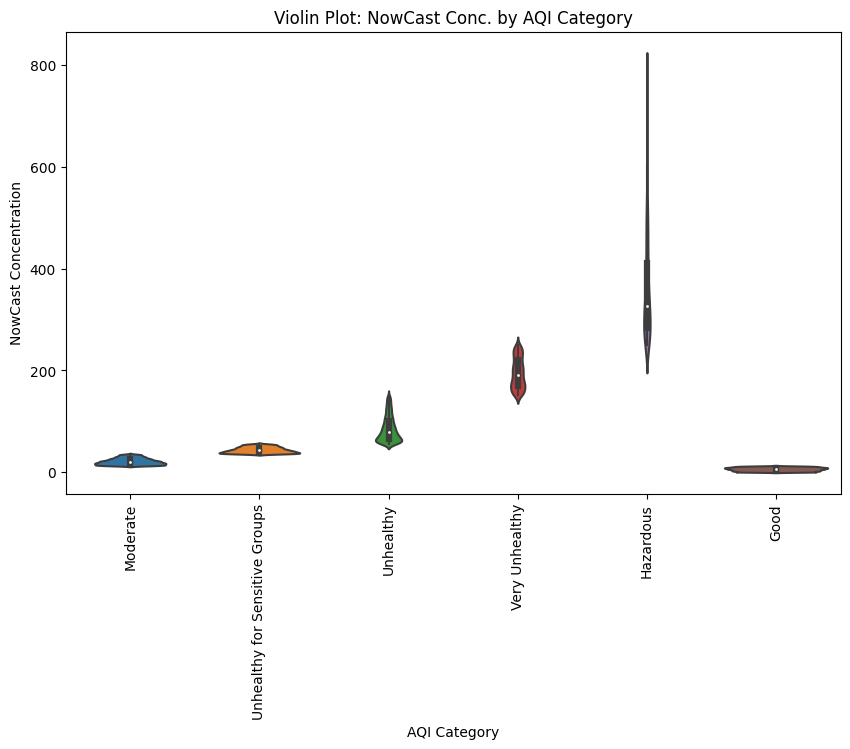

In [11]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

sns.violinplot(x='AQI Category', y='NowCast Conc.', data=df_merged)
plt.xlabel('AQI Category')
plt.ylabel('NowCast Concentration')
plt.title('Violin Plot: NowCast Conc. by AQI Category')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

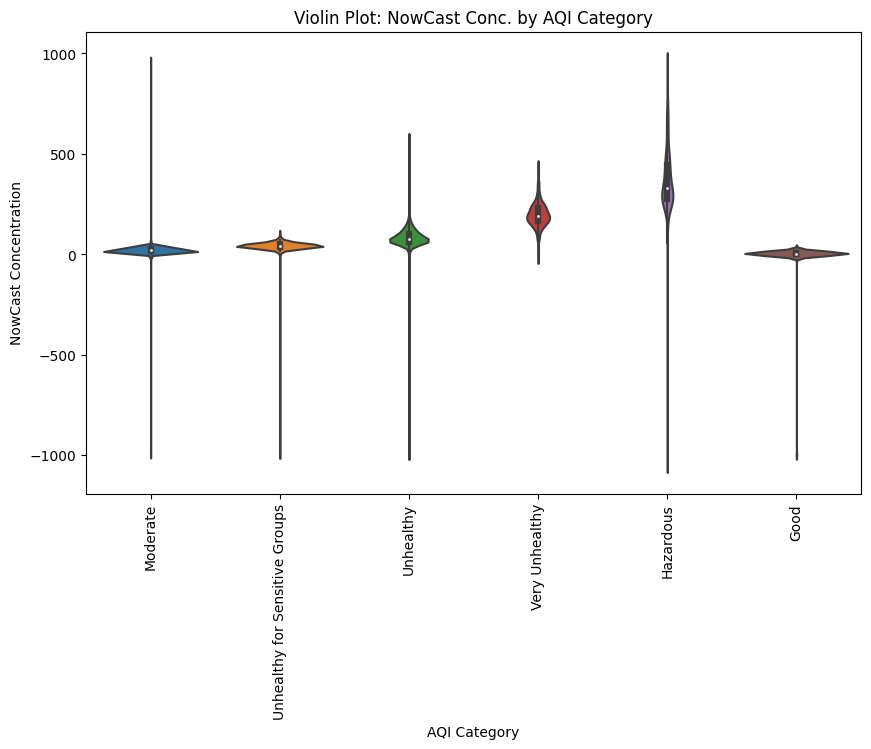

In [12]:
plt.figure(figsize=(10, 6))  

sns.violinplot(x='AQI Category', y='Raw Conc.', data=df_merged)
plt.xlabel('AQI Category')
plt.ylabel('NowCast Concentration')
plt.title('Violin Plot: NowCast Conc. by AQI Category')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()

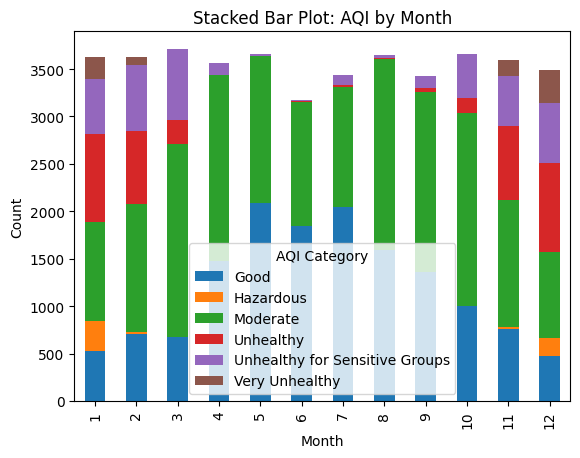

In [13]:
# Stacked bar plot of AQI by month
monthly_aqi_counts = df_merged.groupby(['Month', 'AQI Category']).size().unstack()
monthly_aqi_counts.plot(kind='bar', stacked=True)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: AQI by Month')
plt.show()


In [14]:
selected_columns = ['Date (LT)', 'Raw Conc.']
y = df_merged[selected_columns].copy()  # Make a copy to avoid SettingWithCopyWarning

# Renaming the columns as per your requirement
y.rename(columns={'Date (LT)': 'timestamp', 'Raw Conc.': 'pm25_levels'}, inplace=True)

y['timestamp'] = pd.to_datetime(y['timestamp'])
y.set_index("timestamp", inplace=True)

# Remove outliers 
y = y[y["pm25_levels"] > 0]
y = y[y["pm25_levels"] < 500]

# Resample to 1hr window and calculate the mean, filling missing values
y = y["pm25_levels"].resample("1H").mean().fillna(method='ffill')

print(y)

timestamp
2019-02-06 06:00:00    12.0
2019-02-06 07:00:00    20.0
2019-02-06 08:00:00    21.0
2019-02-06 09:00:00    25.0
2019-02-06 10:00:00    39.0
                       ... 
2024-02-19 20:00:00     1.3
2024-02-19 21:00:00    63.0
2024-02-19 22:00:00    63.0
2024-02-19 23:00:00     0.8
2024-02-20 00:00:00     0.3
Freq: H, Name: pm25_levels, Length: 44155, dtype: float64


In [15]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 44155 entries, 2019-02-06 06:00:00 to 2024-02-20 00:00:00
Freq: H
Series name: pm25_levels
Non-Null Count  Dtype  
--------------  -----  
44155 non-null  float64
dtypes: float64(1)
memory usage: 689.9 KB


## Explore

In [16]:
# Check the minimum and maximum timestamps in the data
min_timestamp = y.index.min()
max_timestamp = y.index.max()

print("Minimum Timestamp:", min_timestamp)
print("Maximum Timestamp:", max_timestamp)

Minimum Timestamp: 2019-02-06 06:00:00
Maximum Timestamp: 2024-02-20 00:00:00


In [17]:
# Find the timestamp with the highest PM2.5 value
timestamp_highest_pm25 = y.idxmax()

# Find the highest PM2.5 value
highest_pm25_value = y.max()

print("Timestamp with the Highest PM2.5:", timestamp_highest_pm25)
print("Highest PM2.5 Value:", highest_pm25_value)

Timestamp with the Highest PM2.5: 2021-01-03 22:00:00
Highest PM2.5 Value: 494.0


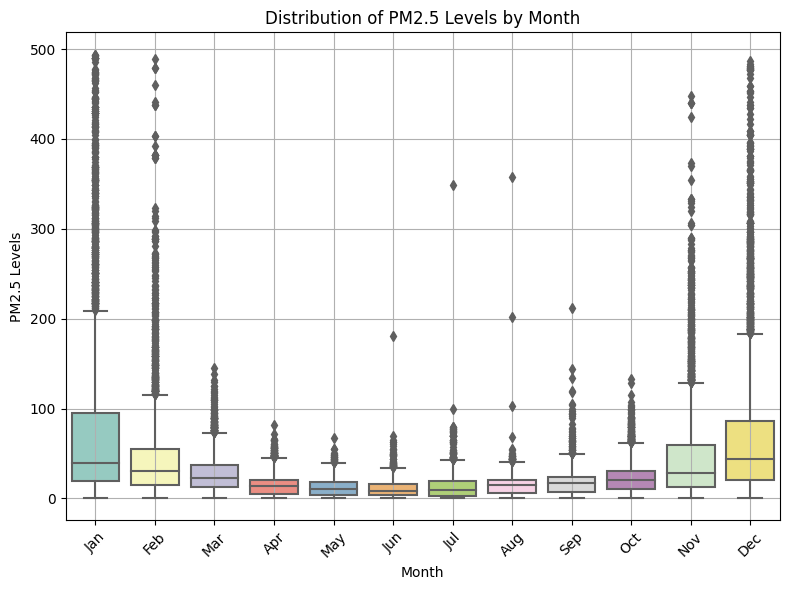

In [18]:
# Convert the index to DatetimeIndex if it's not already
y.index = pd.to_datetime(y.index)

plt.figure(figsize=(8, 6))

# Plot a boxplot of PM2.5 levels by month
sns.boxplot(x=y.index.month, y=y, palette="Set3")

# Set the x-axis labels to be the names of the months
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xlabel("Month")
plt.xticks(range(12), month_names)  # Use month_names as labels
plt.ylabel("PM2.5 Levels")
plt.title("Distribution of PM2.5 Levels by Month")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

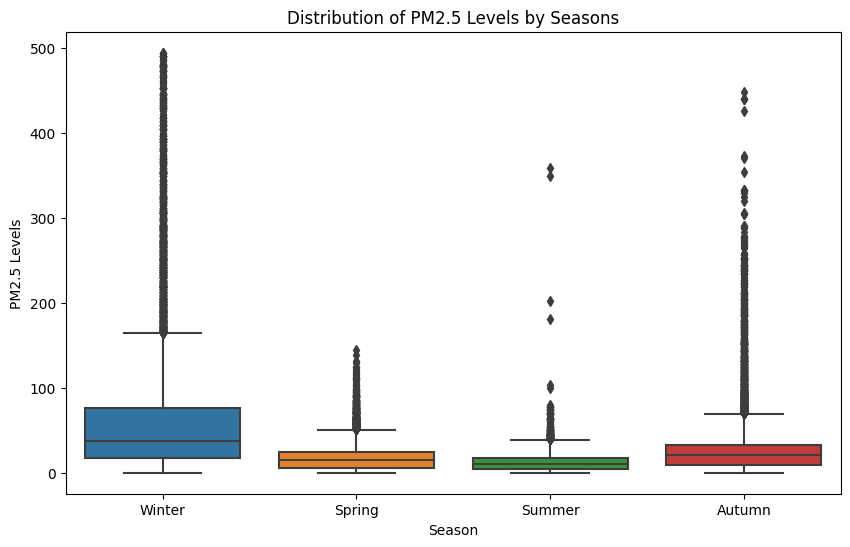

In [19]:
# Convert the Series 'y' to a DataFrame
df = pd.DataFrame({'pm25_levels': y})

# Drop the last entry with the value "cluster"
df = df[df.index != 'cluster']

# Convert the index to a DatetimeIndex
df = df[df.index != 'season']  # Drop any rows with index labeled "season"
df.index = pd.to_datetime(df.index)

# Create a new column for seasons based on months
df['season'] = df.index.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring',
                                   6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn',
                                   11: 'Autumn', 12: 'Winter'})

# Create a box plot to visualize the distribution of PM2.5 levels by seasons
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='pm25_levels', data=df)
plt.xlabel("Season")
plt.ylabel("PM2.5 Levels")
plt.title("Distribution of PM2.5 Levels by Seasons")
plt.show()

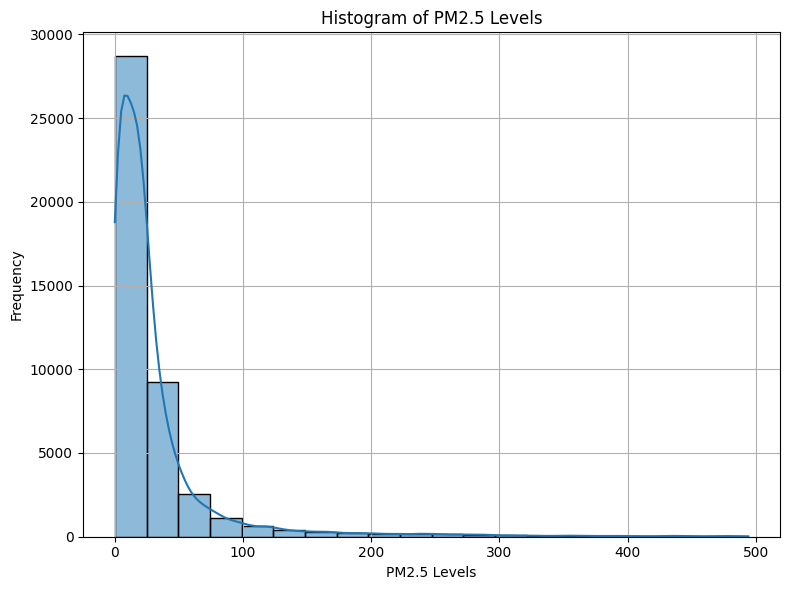

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(y, bins=20, kde=True)
plt.xlabel("PM2.5 Levels")
plt.ylabel("Frequency")
plt.title("Histogram of PM2.5 Levels")
plt.grid(True)
plt.tight_layout()
plt.show()

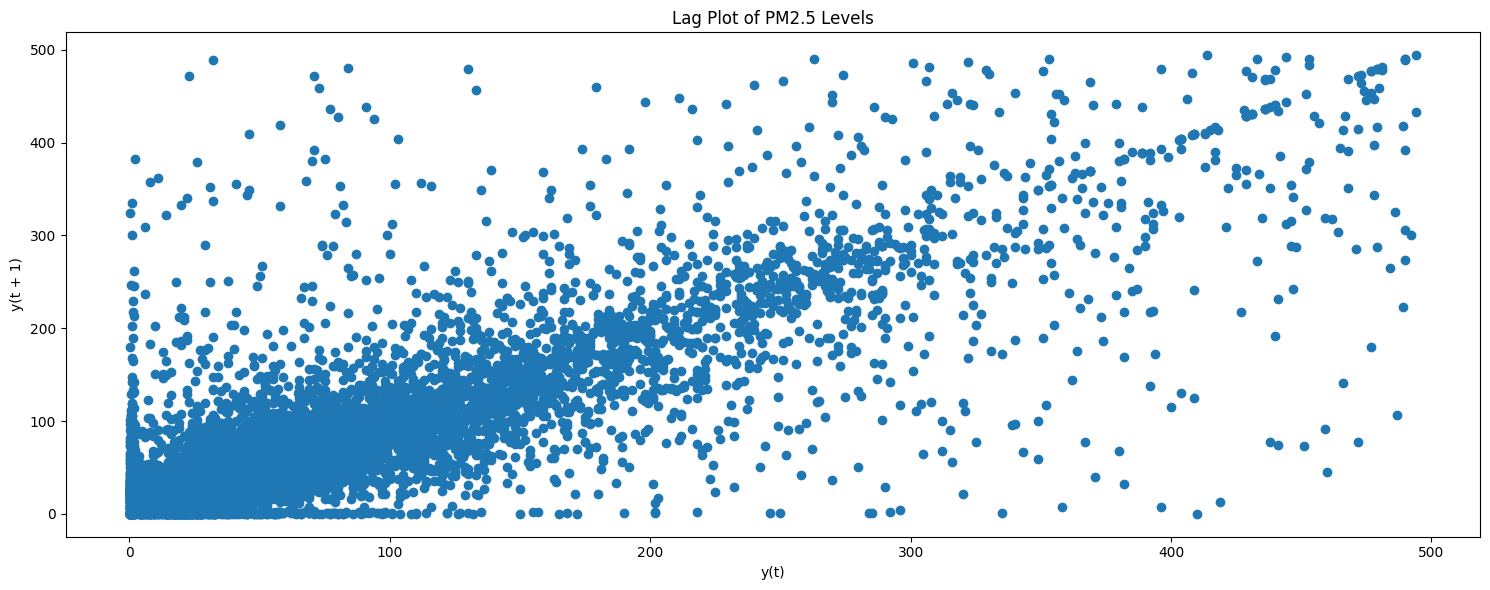

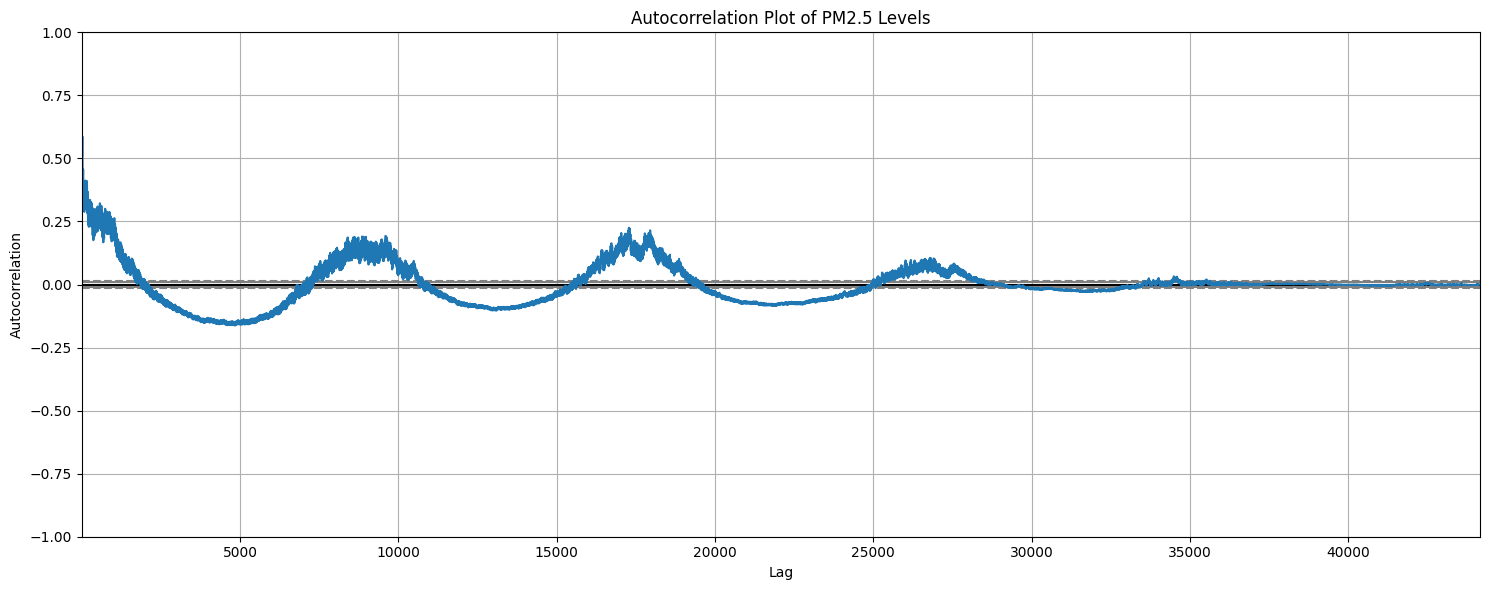

In [21]:
plt.figure(figsize=(15, 6))
lag_plot(y)
plt.title("Lag Plot of PM2.5 Levels")
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))
autocorrelation_plot(y)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation Plot of PM2.5 Levels")
plt.grid(True)
plt.tight_layout()
plt.show()

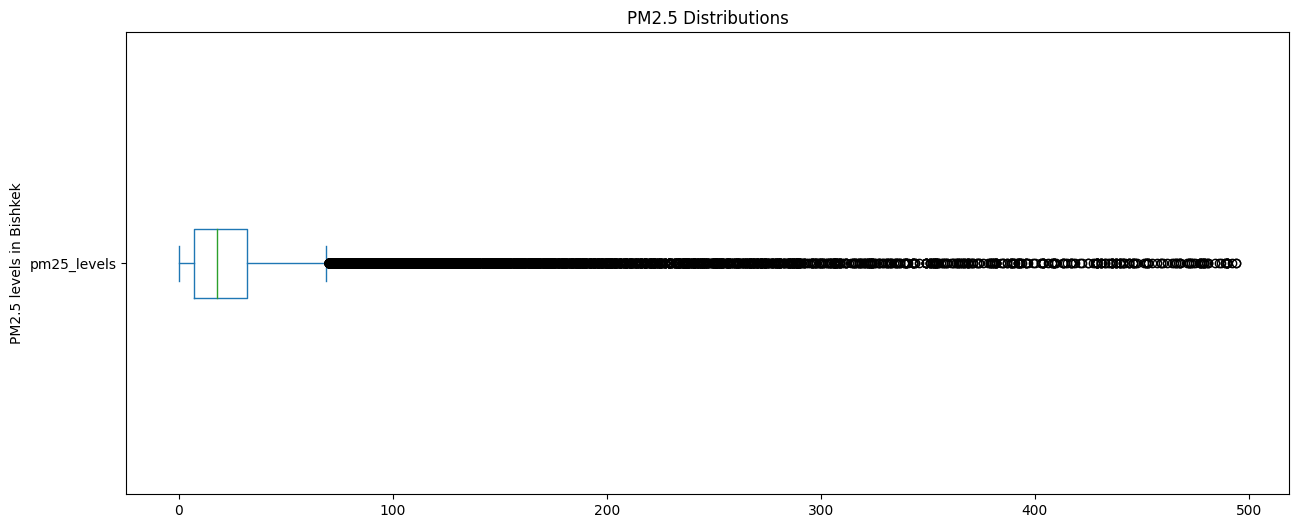

In [22]:
fig, ax = plt.subplots(figsize=(15, 6))
y.plot(kind="box",vert=False,title="PM2.5 Distributions", ax=ax)
plt.ylabel("PM2.5 levels in Bishkek");

## PM2.5 Air Quality Guidelines

In our analysis, we have chosen to remove PM2.5 values that are greater than 500. These values are considered outliers based on the air quality standards for particle pollution published by the U.S. Environmental Protection Agency.

| PM2.5 Range | Air Quality Index | PM2.5 Health Effects | Precautionary Actions |
|-------------|-------------------|---------------------|-----------------------|
| 0 to 12.0   | Good              | Little to no risk. | None.                 |
| 12.1 to 35.4| Moderate          | Unusually sensitive individuals may experience respiratory symptoms. | Unusually sensitive people should consider reducing prolonged or heavy exertion. |
| 35.5 to 55.4| Unhealthy for Sensitive Groups | Increasing likelihood of respiratory symptoms in sensitive individuals, aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly. | People with respiratory or heart disease, the elderly and children should limit prolonged exertion. |
| 55.5 to 150.4 | Unhealthy       | Increased aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly; increased respiratory effects in general population. | People with respiratory or heart disease, the elderly and children should avoid prolonged exertion; everyone else should limit prolonged exertion. |
| 150.5 to 250.4 | Very Unhealthy  | Significant aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly; significant increase in respiratory effects in general population. | People with respiratory or heart disease, the elderly and children should avoid any outdoor activity; everyone else should avoid prolonged exertion. |
| 250.5 to 500.4 | Hazardous       | Serious aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly; serious risk of respiratory effects in general population. | Everyone should avoid any outdoor exertion; people with respiratory or heart disease, the elderly and children should remain indoors. |

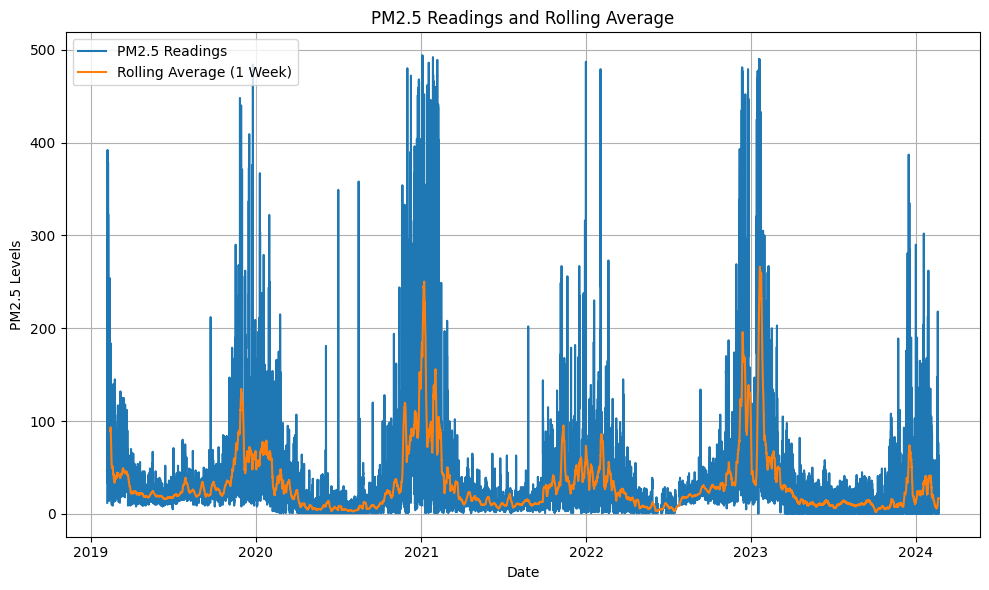

In [23]:
# Plot rolling average
y.index = pd.to_datetime(y.index)

# Calculate the rolling average with a window of 168 (1 week)
rolling_avg = y.rolling(window=168).mean()

# Plot the original data and the rolling average
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='PM2.5 Readings')
plt.plot(rolling_avg.index, rolling_avg, label='Rolling Average (1 Week)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels')
plt.title('PM2.5 Readings and Rolling Average')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

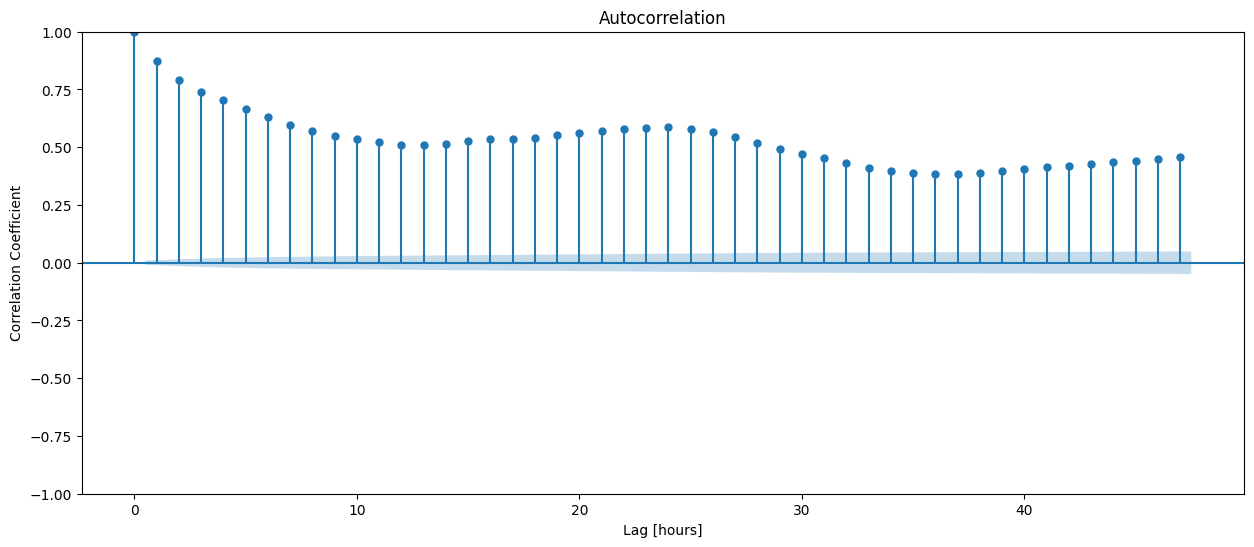

In [24]:
# Plot ACF plot
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

/Users/mac/anaconda3/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


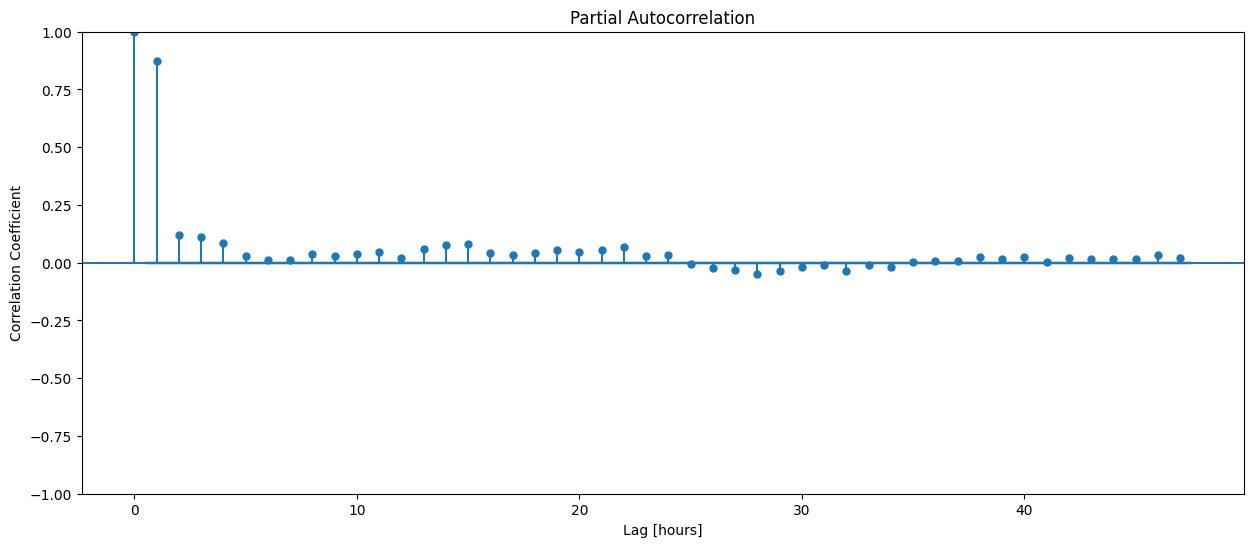

In [25]:
# Plot PACF plot
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient");

## Split

In [26]:
cutoff_test = int(len(y)*0.95)

y_train = y.iloc[:cutoff_test]
y_test = y.iloc[cutoff_test:]

# Build Model

## Baseline

In [27]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean P2 Reading:", round(y_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 31.47
Baseline MAE: 27.02


<font size="+2"><strong> 1. Autoregressive Models</strong></font>

# Iterate

In [28]:
model = AutoReg(y_train,lags=26).fit()

In [29]:
""" Generate a list of training predictions for our model and
use them to calculate your training mean absolute error."""
y_pred = model.predict().dropna()
training_mae = mean_absolute_error(y_train.iloc[26:],y_pred)
print("Training MAE:", training_mae)

Training MAE: 9.54892503264793


In [30]:
# Use y_train and y_pred to calculate the residuals for our model
y_train_resid = model.resid
y_train_resid.tail()

timestamp
2023-11-19 20:00:00     8.680898
2023-11-19 21:00:00   -60.395199
2023-11-19 22:00:00    -8.688272
2023-11-19 23:00:00   -10.375147
2023-11-20 00:00:00    -5.674573
Freq: H, dtype: float64

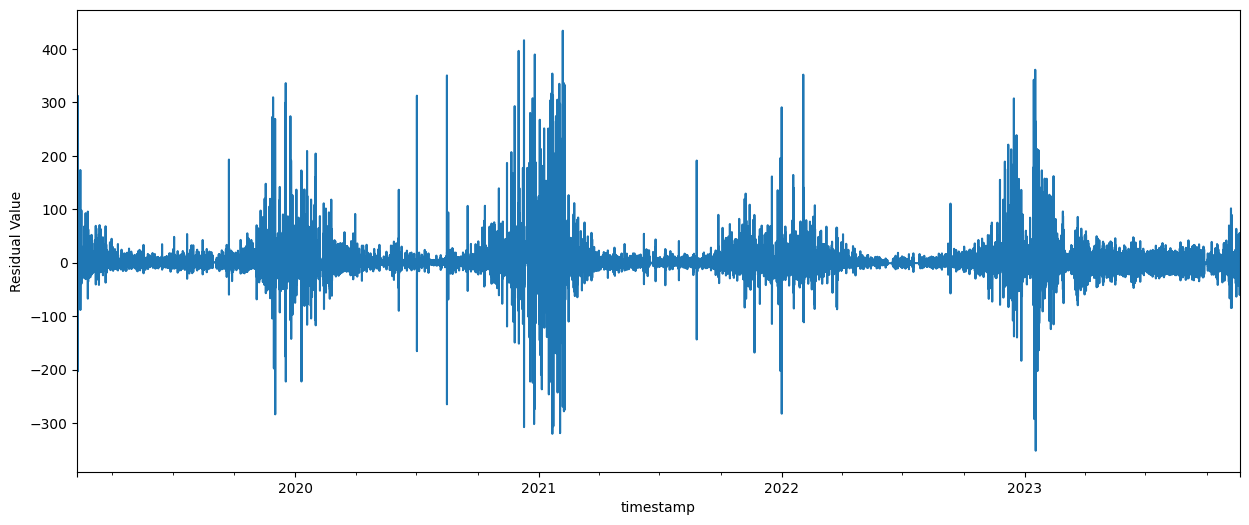

In [31]:
# Create a plot of y_train_resid
fig, ax = plt.subplots(figsize=(15, 6))
y_train_resid.plot(ylabel="Residual Value",ax=ax);

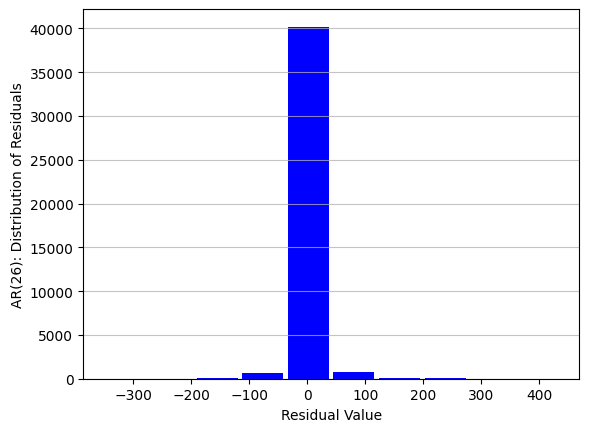

In [32]:
# Create a histogram of y_train_resid
plt.hist(y_train_resid, bins=10, rwidth=0.9, color="b")
plt.grid(axis="y", alpha=0.75)
plt.xlabel("Residual Value")
plt.ylabel("AR(26): Distribution of Residuals");

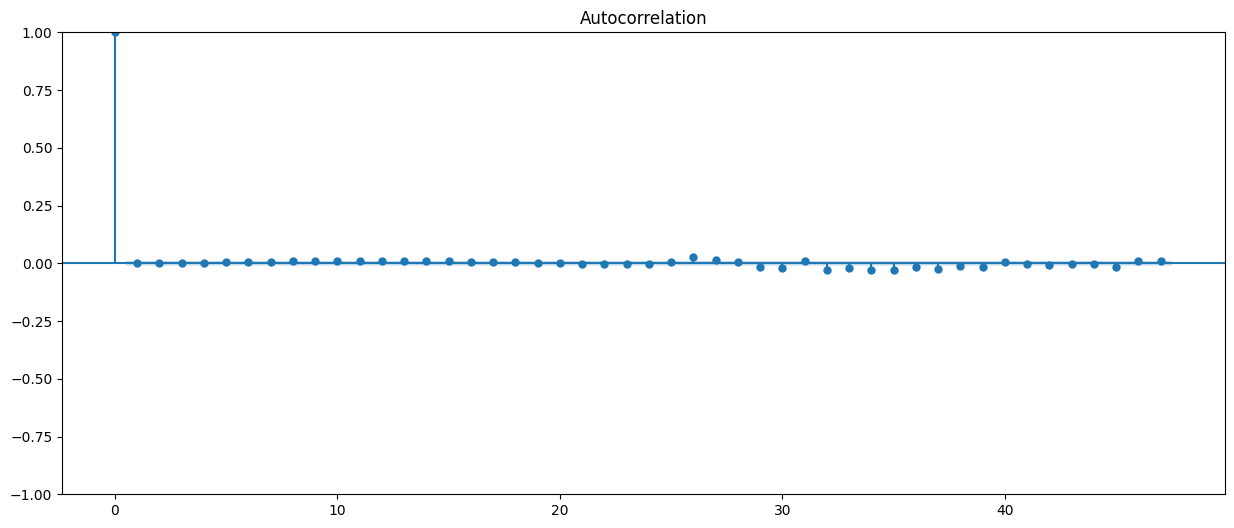

In [33]:
# Create an ACF plot of y_train_resid
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid,ax=ax);

## Evaluate

In [34]:
# Calculate the test mean absolute error for our model
y_pred_test =  model.predict(y_test.index.min(),y_test.index.max())
test_mae = mean_absolute_error(y_test,y_pred_test)
print("Test MAE:", test_mae)

Test MAE: 30.036355449686436


In [35]:
"""Create a DataFrame that has two columns: "y_test" and "y_pred".
The first should contain the true values for our test set, and 
the second should contain our model's predictions."""

df_pred_test = pd.DataFrame(
    {"y_test": y_test, "y_pred": y_pred_test}, index=y_test.index
)
df_pred_test

y_test     y_pred
timestamp                             
2023-11-20 01:00:00     1.1   3.733822
2023-11-20 02:00:00     8.0   3.415478
2023-11-20 03:00:00     9.0   2.225657
2023-11-20 04:00:00     1.3   4.345840
2023-11-20 05:00:00     5.0   4.709062
...                     ...        ...
2024-02-19 20:00:00     1.3  31.123218
2024-02-19 21:00:00    63.0  31.123218
2024-02-19 22:00:00    63.0  31.123218
2024-02-19 23:00:00     0.8  31.123218
2024-02-20 00:00:00     0.3  31.123218

[2208 rows x 2 columns]

In [36]:
# Create a time series plot for the values in df_pred_test using plotly express
fig = px.line(df_pred_test, labels={"value": "pm25_levels"})
fig.show()

From Test MAE and visualization we can see that our model is generalizing not well. Traditional test evaluation does not work when we are working with time series model.
So we should do walk-forward validation.

In [37]:
%%capture
y_pred_wfv = pd.Series()
history = y_train.copy()
for i in range(len(y_test)):
    model = AutoReg(history, lags=26).fit()
    next_pred = model.forecast()
    y_pred_wfv = y_pred_wfv.append(next_pred)
    history = history.append(y_test[next_pred.index])

## Walk-Forward Validation

Our predictions lose power over time because the model gets farther and farther away from its beginning. But what if we could move that beginning forward with the model? That's what **walk-forward validation** is. In a walk-forward validation, we re-train the model at for each new observation in the dataset, dropping the data that's the farthest in the past. Let's say that our prediction for what's going to happen at 12:00 is based on what happened at 11:00, 10:00, and 9:00. When we move forward an hour to predict what's going to happen at 1:00, we only use data from 10:00, 11:00, and 12:00, dropping the data from 9:00 because it's now too far in the past.

In [38]:
# Calculate the test mean absolute error for our model
test_mae = mean_absolute_error(y_test,y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 18.72


# Communicate Results

In [39]:
# Print out the parameters for our trained mode
print(model.params)

const              1.196907
pm25_levels.L1     0.711301
pm25_levels.L2     0.023522
pm25_levels.L3     0.027956
pm25_levels.L4     0.061028
pm25_levels.L5     0.015947
pm25_levels.L6    -0.009669
pm25_levels.L7    -0.021297
pm25_levels.L8     0.010995
pm25_levels.L9    -0.005414
pm25_levels.L10   -0.004483
pm25_levels.L11    0.020740
pm25_levels.L12   -0.028626
pm25_levels.L13   -0.002501
pm25_levels.L14    0.012011
pm25_levels.L15    0.044037
pm25_levels.L16    0.011341
pm25_levels.L17   -0.005696
pm25_levels.L18   -0.001659
pm25_levels.L19    0.013435
pm25_levels.L20    0.002804
pm25_levels.L21    0.006148
pm25_levels.L22    0.046063
pm25_levels.L23    0.005645
pm25_levels.L24    0.038089
pm25_levels.L25    0.010294
pm25_levels.L26   -0.020794
dtype: float64


In [40]:
"""Put the values for y_test and y_pred_wfv into the DataFrame df_pred_test.
Then plot df_pred_test using plotly express."""

data = {"y_test": y_test, "y_pred_wvf":y_pred_wfv}
df_pred_test = pd.DataFrame.from_dict(data)
df_pred_test.head()
fig = px.line(df_pred_test)
fig.show()

## Summary of Air Quality Time Series Analysis in Bishkek

### Data Preparation and Exploration
- Multiple years of air quality data (2019-2024) from Bishkek were collected and cleaned.
- Exploratory data analysis (EDA) revealed insights into seasonal patterns, distribution, and autocorrelation of PM2.5 levels.

### Model Building and Evaluation
#### Baseline Model
- A baseline model using the mean of training data yielded a Mean Absolute Error (MAE) of 27.02.

#### Autoregressive (AR) Model
- An Autoregressive model (AutoReg) with lag=26 was trained on the data.
- While the training MAE was low (9.55), the model exhibited higher error on the test set (MAE: 30.04), indicating potential overfitting.

#### Walk-Forward Validation (WFV)
- Walk-forward validation was employed to iteratively retrain the model on expanding data windows.
- WFV resulted in a lower test MAE of 18.72, suggesting improved generalization.

### Communication of Results
- Model parameters and test results were effectively communicated.
- Visualizations using Plotly Express enhanced the interpretability of predictions against actual values.

### Recommendations
- Continuous refinement and validation of models, particularly through methods like walk-forward validation, are essential for reliable forecasting of air quality trends in Bishkek.